# Analyzing Tides

In this example, you will use programming to plot oceanic data which you will analyze to find out how tides change over time.


In [1]:
# The first pieces of code we need to start with are called 'imports'

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# These imports contain programming instructions (called 'modules') to read data, plot data, etc.
# You can think of imports like tool boxes. Each tool box contains a different set of tools (modules) to use.

# Importing the Data

In [2]:
# We need to read some data. Let's use our tool ".read_csv" located in the "pd" import.

# This data is from a Water Level Station in Miami, FL:
data = pd.read_csv("https://tidesandcurrents.noaa.gov/api/datagetter?product=monthly_mean&application=NOS.COOPS.TAC.WL&begin_date=20160101&end_date=20161201&datum=MLLW&station=8723214&time_zone=GMT&units=english&format=csv",usecols=[0,1,2,4,7,16])
data.columns = data.columns.str.strip()



# Reading the Data

In [3]:
# This command will show us the top 3 rows of our data. 
data.head(3)

# How could we change this command to show us 5 rows? How about the bottom 5 rows?

,Year,Month,Highest,MHW,MLW,Lowest
0,2016,1,3.350,2.648,0.561,-0.210
1,2016,3,3.009,2.290,0.236,-0.335
2,2016,4,2.959,2.533,0.430,-0.200


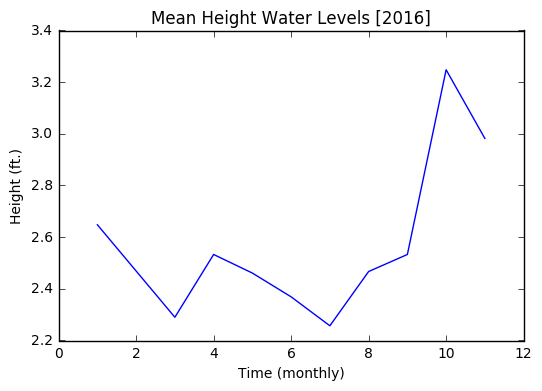

In [4]:
# Now let's plot the data using the "plt" import!

# For this graph, we want to  plot the 'height' as 'time' passes

time = data.Month
height = data.MHW  
            # MHW = Mean High Water

# ".plot" and ".title" are just a few of the modules in the "plt" package
plt.plot(time,height)
plt.title('Mean Height Water Levels [2016]')
plt.xlabel('Time (monthly)')
plt.ylabel('Height (ft.)')
plt.show()

# Interpreting the Data (Part 1)

In [5]:
# =====================
# Spring and Neap tides
# =====================

In [6]:
# Spring tides occur when the daily maximum and minimum tide heights are the GREATEST.
# Neap tides occur when the daily maximum and minimum tide heights are the LOWEST.

# To find out when Spring and Neap tides occurred in Miami, we will subtract the differences between the monthly
# tide levels and plot it.

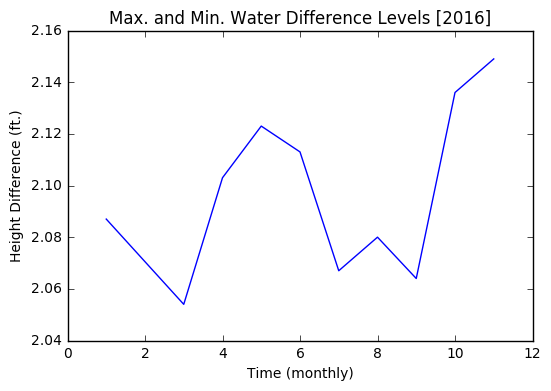

In [7]:
x = data.Month
y = data.MHW-data.MLW 
                # MLW = Mean Low Water
                
plt.plot(x,y)
plt.title('Max. and Min. Water Difference Levels [2016]')
plt.xlabel('Time (monthly)')
plt.ylabel('Height Difference (ft.)')
plt.show()

In [8]:
# By analyzing this plot, can you determine when Spring Tides occurred in 2016?
# When did Neap Tides occur?

# Interpreting the Data (Part 2)

In [9]:
# =============================
# Semidiurnal and Diurnal Tides
# =============================

In [10]:
# The previous analysis allowed us to look at how water levels varied monthly.
# We will now look at a set of data in which the water level was measured every six-minute:
data = pd.read_csv("https://tidesandcurrents.noaa.gov/api/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20161130&end_date=20161130&datum=MLLW&station=8723214&time_zone=GMT&units=english&format=csv",usecols=[0,1])
data.columns = data.columns.str.strip()

In [11]:
data.head(5)

,Date Time,Water Level
0,2016-11-30 00:00,2.001
1,2016-11-30 00:06,2.041
2,2016-11-30 00:12,2.073
3,2016-11-30 00:18,2.106
4,2016-11-30 00:24,2.139


In [12]:
# Notice the Water Level increasing? We can plot the entire data set to find the rising (and falling) 
# water level. The 'peaks' are at high tide and the 'troughs' are at low tide.

# Diurnal Tides have one high tide and one low tide in one day.
# Semidiurnal Tides have two high tides and two low tides in one day.

# Let's see what a plot looks like:

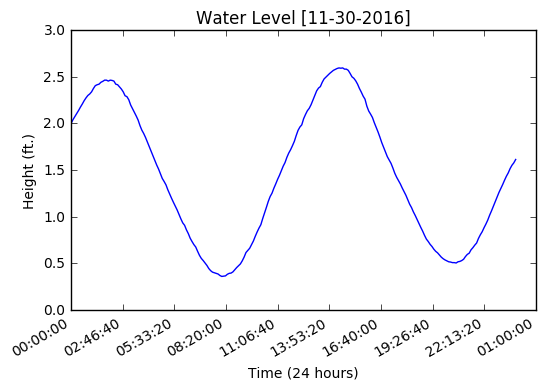

In [25]:
x = pd.to_datetime(data["Date Time"]).dt.time
y = data["Water Level"]

plt.title('Water Level [11-30-2016]')
plt.xlabel('Time (24 hours)')
plt.ylabel('Height (ft.)')
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# Can you tell from this graph whether Miami, FL has Semidiurnal or Diurnal tides?